# Annual Income

To do
* First pass at preprocessing pipeline
* Basic (not tuned) models: KNN, logistic regression, SVM, tree based methods

https://archive.ics.uci.edu/dataset/2/adult

## Preliminaries

### Imports

In [15]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

### Import the data

In [16]:
# fetch dataset 
adult = fetch_ucirepo(id=2).data.original 

In [17]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis

In [18]:
adult_eda = adult.copy()

In [19]:
adult_eda['income'] = adult_eda['income'].apply(lambda s: s[:-1] if s[-1]=='.' else s)

In [20]:
adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
adult_eda.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
num_vars = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

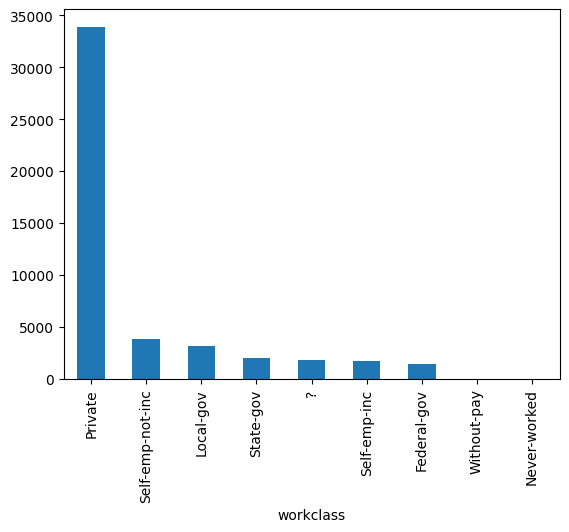

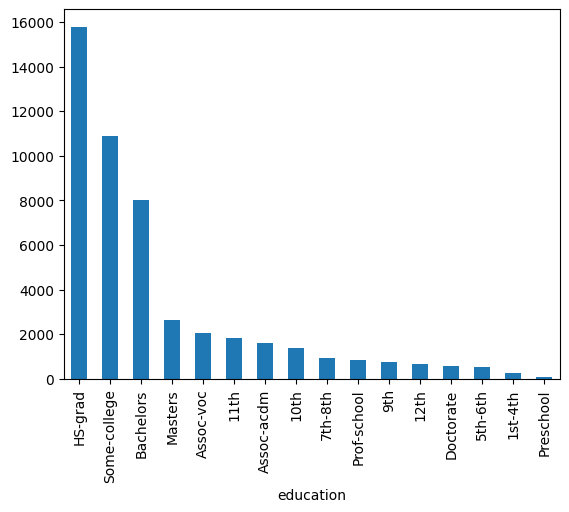

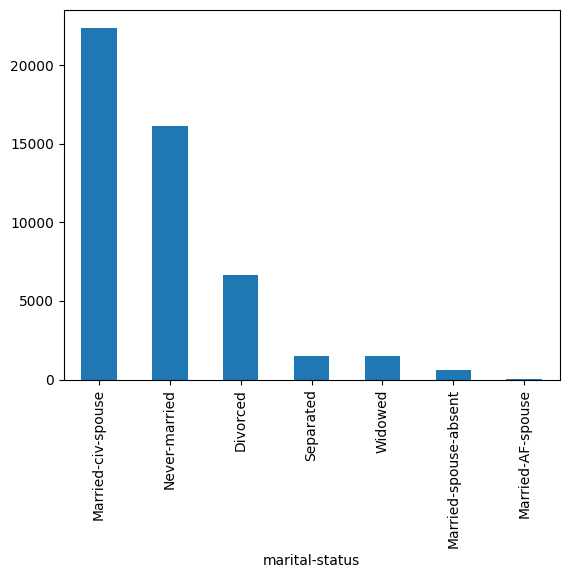

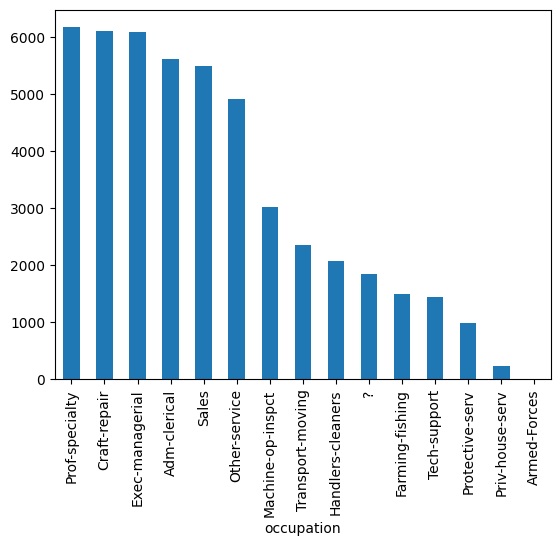

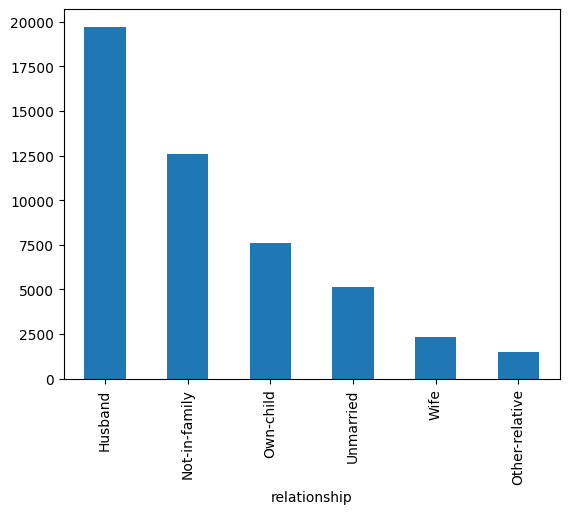

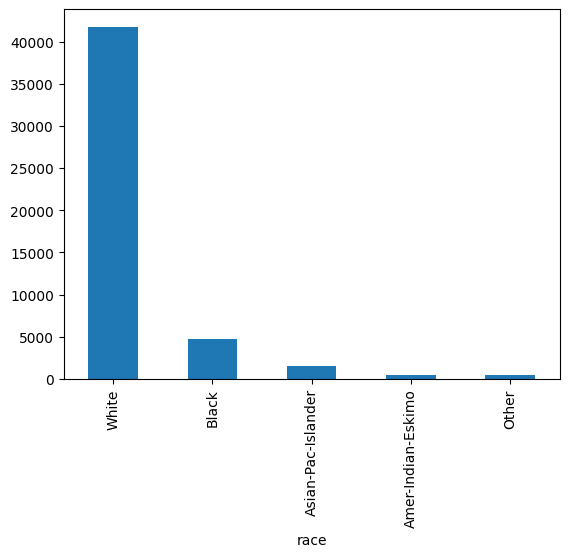

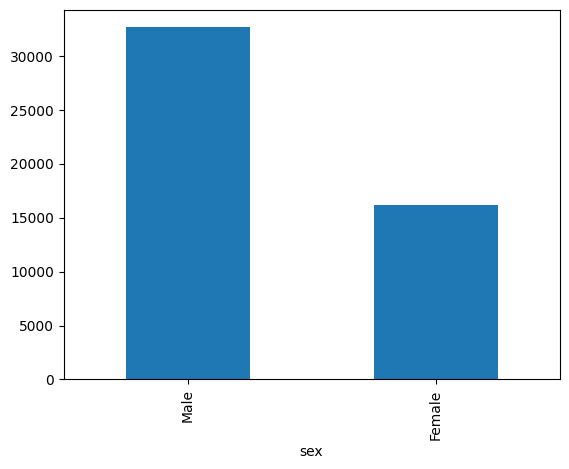

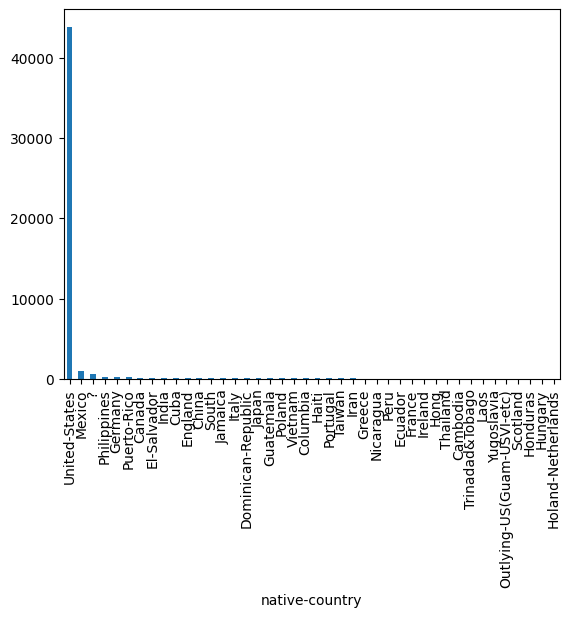

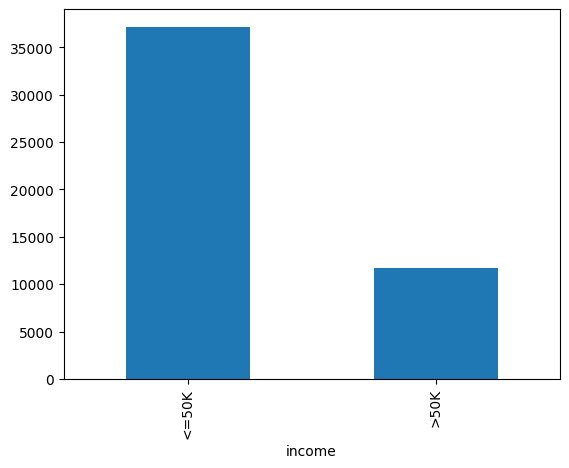

In [23]:
for cat_var in cat_vars:
    adult_eda[cat_var].value_counts().plot.bar()
    plt.show()

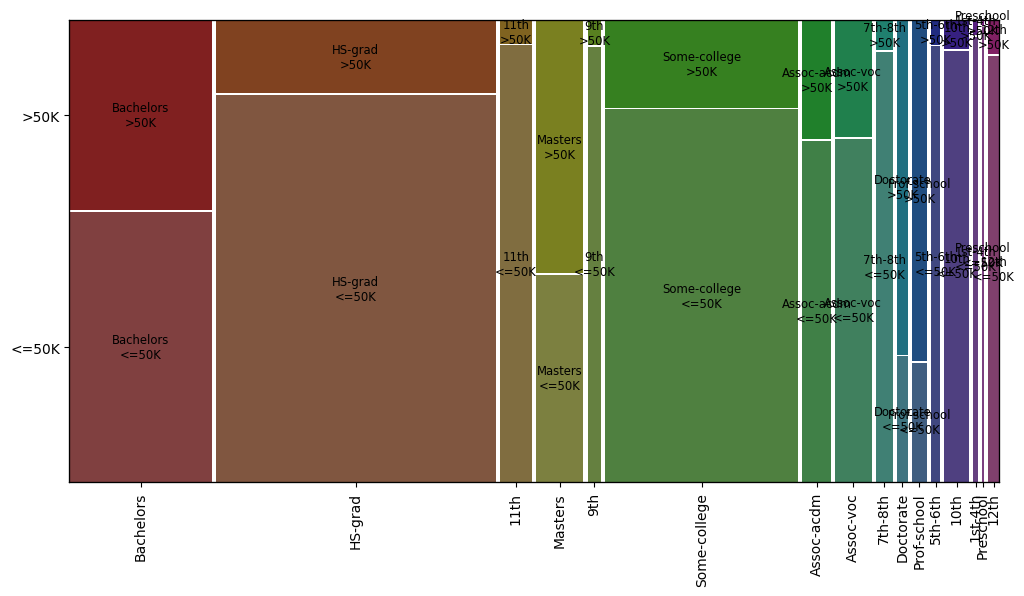

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['education', 'income']], ['education', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

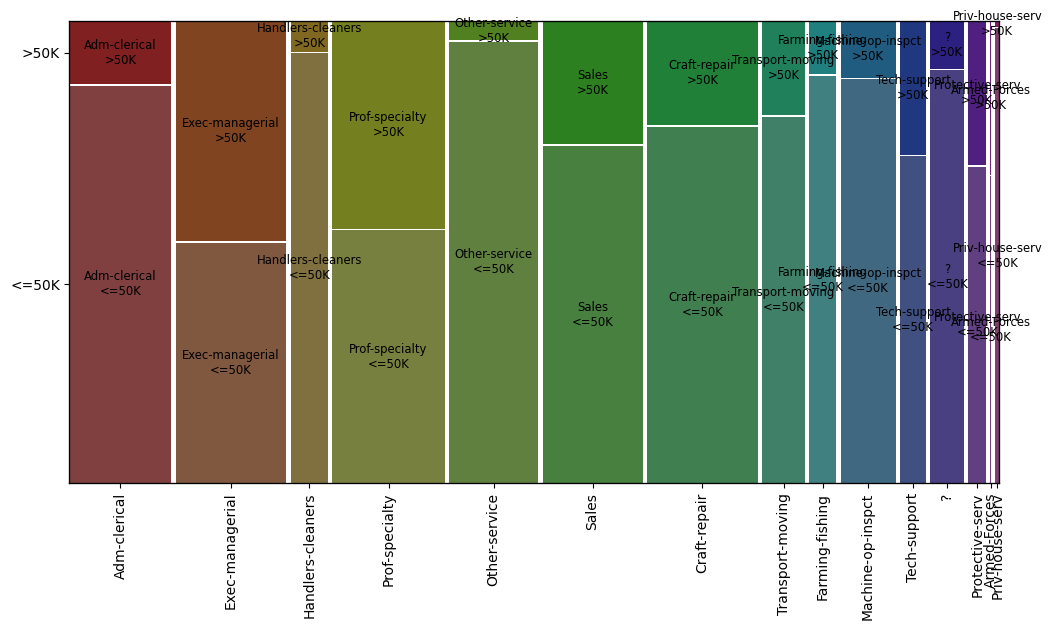

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['occupation', 'income']], ['occupation', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

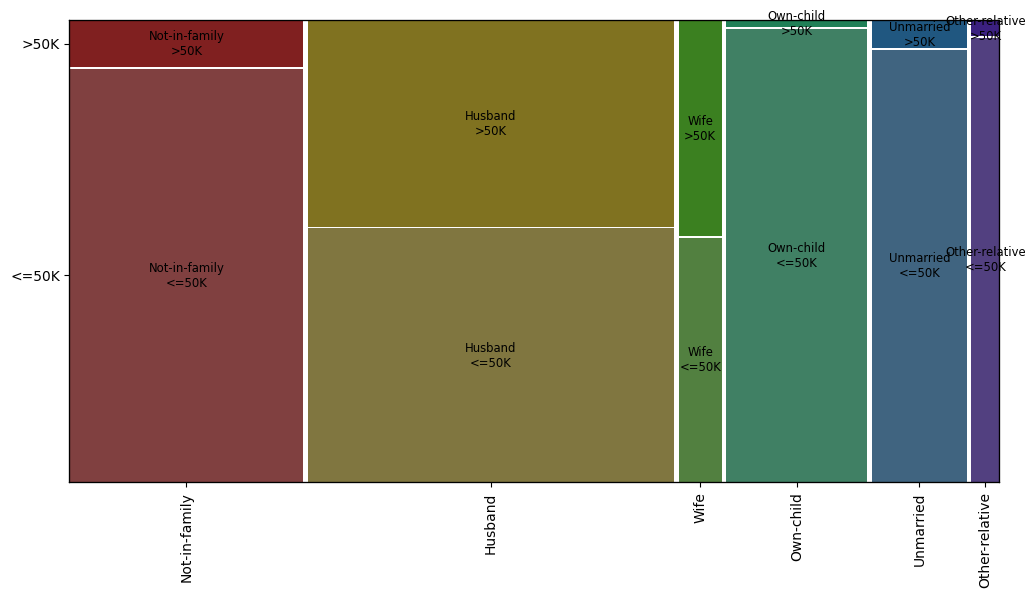

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
mosaic(adult_eda[['relationship', 'income']], ['relationship', 'income'], ax)
ax.tick_params('x', labelrotation=90)
plt.show()

<Axes: title={'center': 'Counts for age group, income groups'}, xlabel='age group,income'>

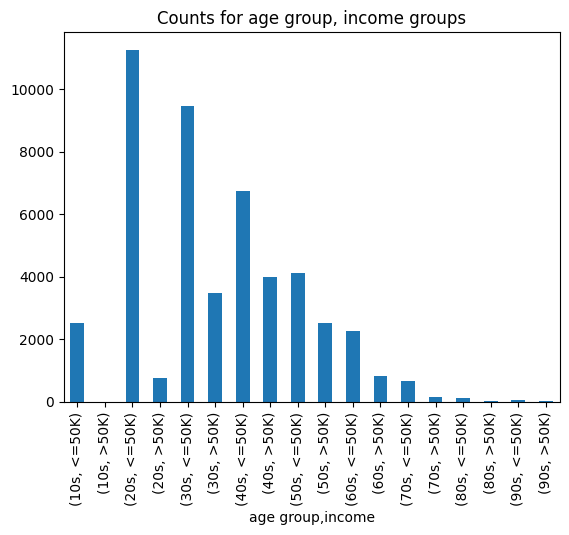

In [51]:
adult_eda['age group'] = adult_eda['age'].apply(lambda n: f"{n//10}0s")
adult_eda[['age group', 'income']].groupby(['age group', 'income']).size().plot(kind='bar', title="Counts for age group, income groups")


## Preprocessing

In [66]:
preprocessed = adult.copy()

In [ ]:
# Cleaning data
preprocessed["income"] = preprocessed["income"].apply(lambda s: s[0:-1] if s[-1]=="." else s)

In [ ]:
# Creating dummy variables for categorical predictors
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
preprocessed = pd.get_dummies(preprocessed, columns=cat_vars, drop_first=True, dtype=int)

In [70]:
preprocessed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
